### Data Collection:

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_rating = pd.read_csv("Dataset.csv")
df_rating.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [3]:
df_movies = pd.read_csv("Movie_Id_Titles.csv")
df_movies.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


Merge movies and ratings data

In [4]:
movie_data = pd.merge(df_rating, df_movies, on='item_id')
movie_data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


### Data Preprocessing:

In [5]:
# Check for missing values in the merged dataset
print("\nMissing Values:")
print(movie_data.isnull().sum())


Missing Values:
user_id      0
item_id      0
rating       0
timestamp    0
title        0
dtype: int64


In [6]:
# drop rows with missing values:
movie_data.dropna(inplace=True)

# Reset index after dropping rows
movie_data.reset_index(drop=True, inplace=True)

In [7]:
# For collaborative filtering
user_ratings = movie_data.pivot_table(index='user_id', columns='title', values='rating')
user_ratings.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Fill missing values with 0 (assuming no rating means a rating of 0)
user_ratings = user_ratings.fillna(0)
user_ratings.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
user_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 944 entries, 0 to 943
Columns: 1664 entries, 'Til There Was You (1997) to Á köldum klaka (Cold Fever) (1994)
dtypes: float64(1664)
memory usage: 12.0 MB


### Exploratory Data Analysis:

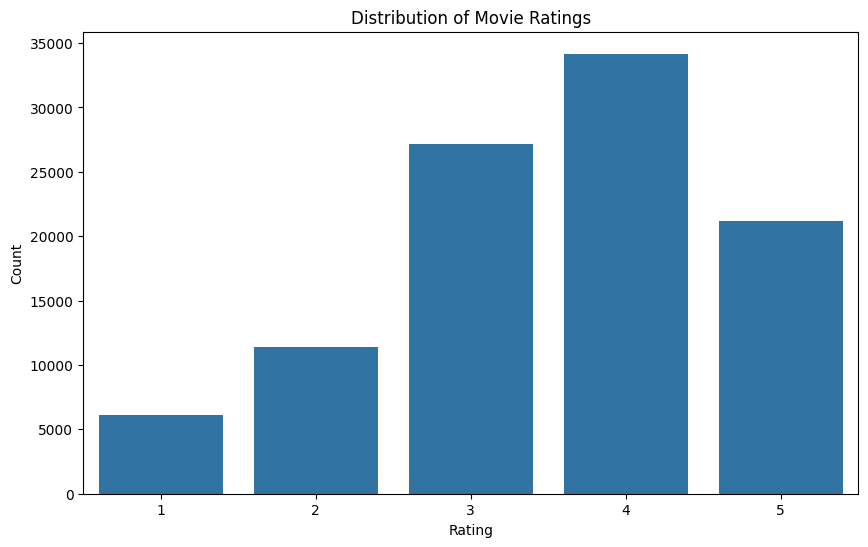

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explore the distribution of movie ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=movie_data)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

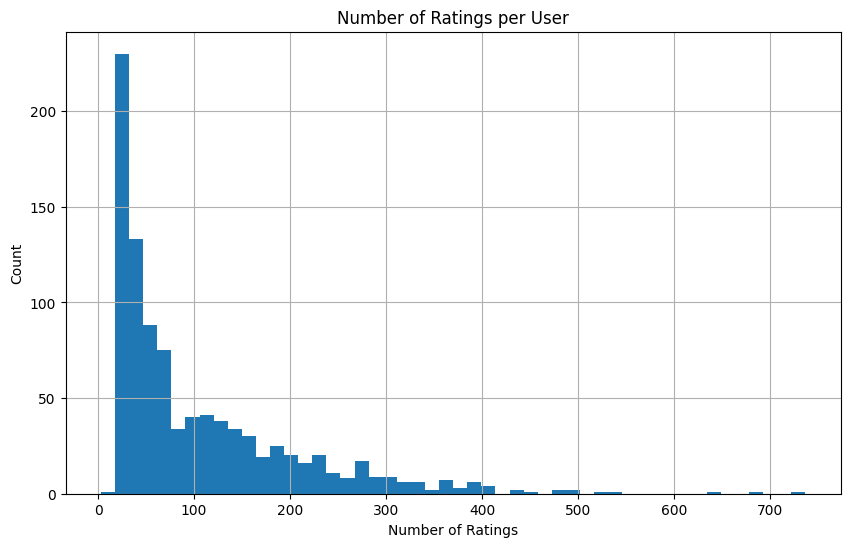

In [11]:
# Explore user preferences (e.g., number of ratings per user)
user_ratings1 = movie_data.groupby('user_id')['rating'].count()
plt.figure(figsize=(10, 6))
user_ratings1.hist(bins=50)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()

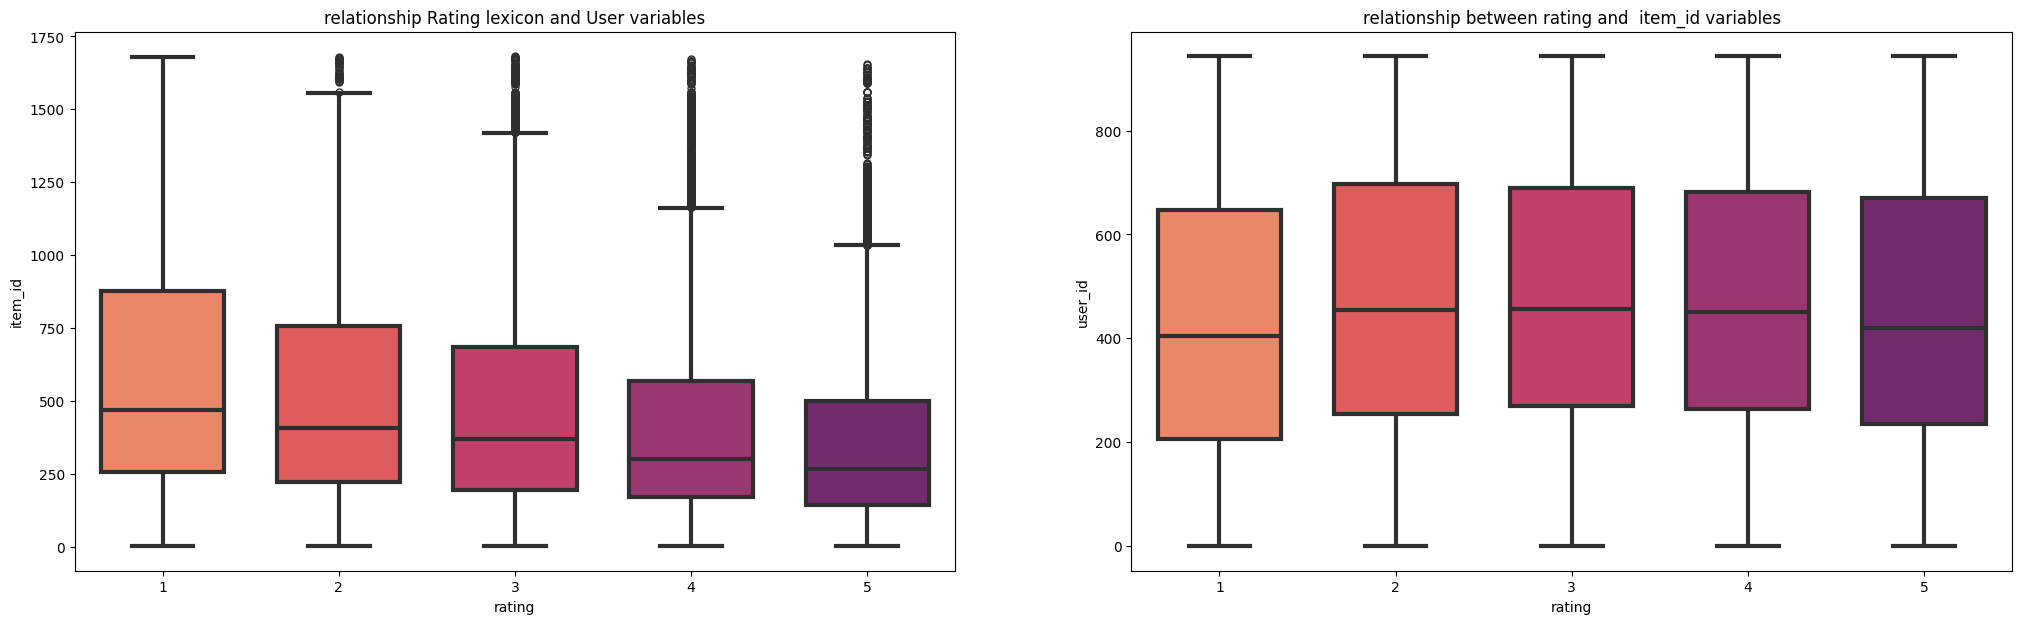

In [12]:
fig, axes = plt.subplots(1, 2, figsize = (25, 7))
sns.boxplot(ax = axes[0], x = "rating", y = "item_id", data = movie_data, width = 0.7, orient = "v", fliersize = 5,
            saturation = 1, linewidth = 3,palette='flare');
axes[1].set_title("relationship between rating and  item_id variables");

sns.boxplot(ax = axes[1], x = "rating", y = "user_id", data = movie_data, width = 0.7, orient = "v", fliersize = 5,
            saturation = 1, linewidth = 3,palette='flare')
axes[0].set_title("relationship Rating lexicon and User variables");  

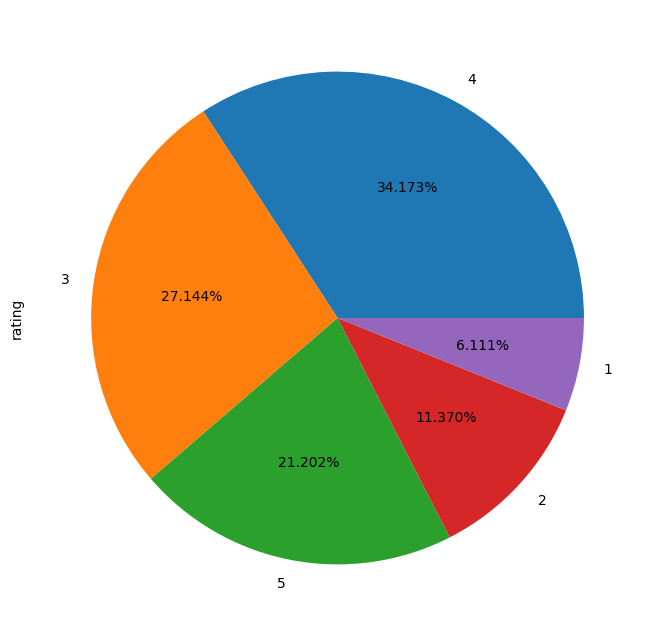

In [13]:
plt.figure(figsize = [8, 8], clear = True, )
movie_data["rating"].value_counts().plot.pie( autopct='%1.3f%%');

<Axes: title={'center': 'Top 15 Movies'}, ylabel='None'>

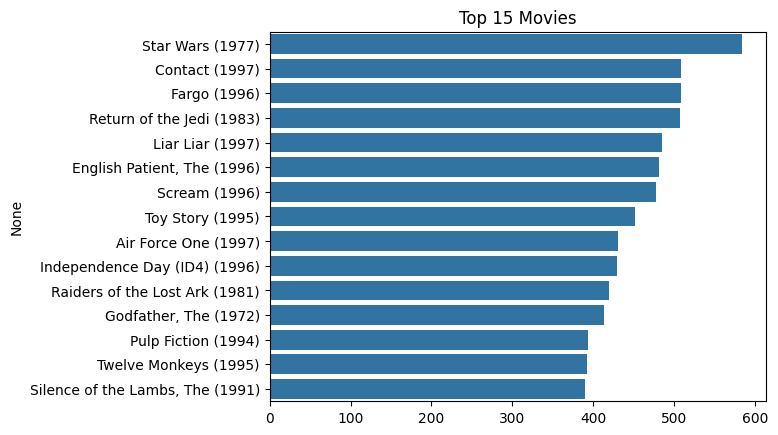

In [14]:
tmp_d = movie_data['title'].value_counts()
plt.title('Top 15 Movies')
sns.barplot(y=tmp_d.keys()[:15], x=tmp_d.values[:15])

### Collaborative Filtering:

In [15]:
user_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 944 entries, 0 to 943
Columns: 1664 entries, 'Til There Was You (1997) to Á köldum klaka (Cold Fever) (1994)
dtypes: float64(1664)
memory usage: 12.0 MB


In [16]:
from sklearn.metrics.pairwise import cosine_similarity

# Reshape user_ratings into a 2D array
user_ratings_2d = user_ratings.values

In [17]:
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
train_data, test_data = train_test_split(user_ratings_2d, test_size=0.2, random_state=42)

# Build a k-nearest neighbors model for collaborative filtering
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
model_knn.fit(train_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [20]:
# Function to get movie recommendations
def get_movie_recommendations(movie_title, num_recommendations=10):
    movie_id = df_movies.loc[df_movies['title'] == movie_title]['item_id'].values
    if len(movie_id) == 0:
        print(f"Movie '{movie_title}' not found.")
        return []
    movie_id = movie_id[0] - 1  # Adjusted for 0-based indexing
    distances, indices = model_knn.kneighbors(user_ratings_2d[movie_id].reshape(1, -1), n_neighbors=num_recommendations + 1)
    recommended_movie_indices = [i for i in indices.flatten()]
    recommended_movies = []
    for idx in recommended_movie_indices:
        movie_info = df_movies[df_movies['item_id'] == (idx + 1)]
        if not movie_info.empty:
            recommended_movies.append(movie_info['title'].values[0])
    return recommended_movies




# Example usage: Get recommendations for a movie
movie_title = "Star Wars (1977)"
recommendations = get_movie_recommendations(movie_title)
print(f"Recommended movies for '{movie_title}':")
for i, movie in enumerate(recommendations):
    print(f"{i + 1}. {movie}")


Recommended movies for 'Star Wars (1977)':
1. Fluke (1995)
2. Smoke (1995)
3. Batman Returns (1992)
4. Breaking the Waves (1996)
5. Ben-Hur (1959)
6. Nell (1994)
7. My Own Private Idaho (1991)
8. Red Corner (1997)
9. Crucible, The (1996)
10. Persuasion (1995)
11. Short Cuts (1993)


In [19]:
import joblib

joblib.dump(model_knn, "recommender.pkl")

['recommender.pkl']